In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats

In [15]:
negative_selection = [] # Will be at the complete top of the script

path_folder = '/home/arshad/apis-queen-gene-afs/bootstrapping/dfe-estimates-queen/'

for file in tqdm(os.listdir(path_folder), total=len(path_folder)):
    if os.stat(f'{path_folder}/{file}').st_size == 0:
        continue
    else:   
        df = pd.read_csv(f'{path_folder}/{file}', sep=' ', header=None)
        df.columns = ['rand1', 'rand2', 'one', 'rand3', 'rand4', 'ten', 'rand5', 'rand6', 'hundred', 'rand7', 
                      'rand8', 'infinity', 'check']
        df.drop(columns =[column for column in df.columns if 'rand' in column], inplace=True)

        negative_selection.append(df)

missense_estimates = pd.concat(negative_selection)

5000it [00:17, 282.16it/s]                      


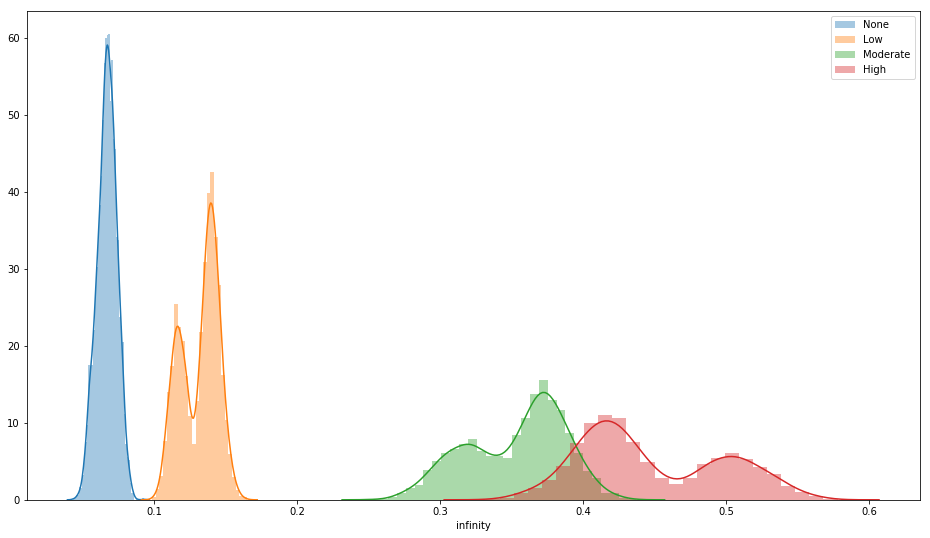

In [16]:
graph.figure(figsize=(16,9))
sns.distplot(missense_estimates['one'], norm_hist=True, label='None')
sns.distplot(missense_estimates['ten'], norm_hist=True, label='Low')
sns.distplot(missense_estimates['hundred'], norm_hist=True, label='Moderate')
sns.distplot(missense_estimates['infinity'], norm_hist=True, label='High')
graph.legend()
graph.show()

In [17]:
worker = pd.read_csv('/home/arshad/apis-missense-worker-parallel-proper-5kiterations-3-gene-sets.csv')

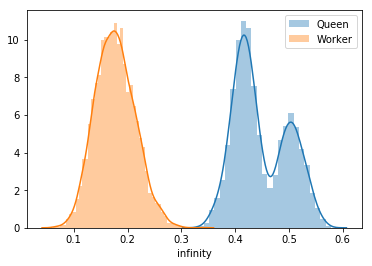

In [19]:
sns.distplot(missense_estimates['infinity'], norm_hist=True, label='Queen')
sns.distplot(worker['infinity'], norm_hist=True, label='Worker')
graph.legend()
graph.show()

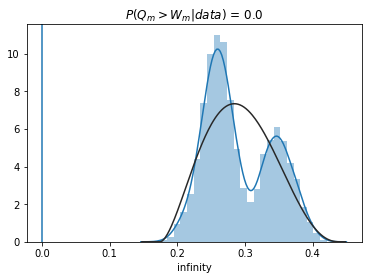

*** Sig!


In [24]:
delta_apis = (missense_estimates['infinity'] - worker['infinity']).dropna()

graph.title(rf'$P(Q_m > W_m|data)$ = {1-(delta_apis >= 0).mean()}', fontsize=12)
sns.distplot(delta_apis, fit=stats.beta)
graph.axvline(0)
graph.show()

delta_dist = stats.beta(*stats.beta.fit(delta_apis))

print('Nonsig' if delta_dist.ppf(0.025) <= 0 <= delta_dist.ppf(0.975) else '*** Sig!')